# EDA 

Let's start with imports and reading the csv file into a DataFrame, then showing a few rows of it.

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [8]:
df = pd.read_csv('concat_df.csv', encoding='utf-8')

In [9]:
df.size

143241

Total of 143241 entries in the dataset before cleaning.

In [10]:
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,car_title,sub_model,year_of_manufactoring,num_of_owners,car_engine_size,price,air_pollution_rate,קילומטראז',סוג מנוע,תיבת הילוכים,צבע,תאריך עליה לכביש,טסט עד,בעלות נוכחית,מותאם לנכים,בעלות קודמת
0,0,0.0,0.0,ג'יפ / Jeep גרנד צ'ירוקי,4X4 Laredo + SR אוט' 3.6 (282 כ''ס),2014,1,"3,604",105000.0,5.0,"209,000",בנזין,אוטומט,לבן,11/2014,11/2023,פרטית,לא,NaN
1,1,1.0,1.0,יונדאי טוסון,"Open Sky אוט' בנזין 2.0 (155 כ""ס)",2017,1,"1,999",99000.0,15.0,"130,000",בנזין,אוטומט,אפור,02/2017,02/2024,פרטית,לא,NaN
2,2,2.0,2.0,אאודי A6,C5 אוט' 2.8 (193 כ''ס),1998,5,"2,771",13000.0,NaN,"341,500",בנזין,אוטומט,אפור,12/1998,07/2023,פרטית,לא,פרטית
3,3,3.0,3.0,מאזדה 3,Spirit הצ'בק אוט' 2.0 (165 כ''ס),2020,1,"1,998",124000.0,6.0,"29,000",בנזין,אוטומט,כחול כהה מטאלי,05/2020,05/2024,פרטית,לא,NaN
4,4,4.0,4.0,פורד קוגה,"Titanium X אוט' 1.5 (182 כ""ס)",2018,1,"1,498",60000.0,15.0,"147,000",בנזין,אוטומט,כסוף מטאלי,06/2018,06/2023,פרטית,לא,NaN


According to the table we have found out that we need to handle with data that miss matches.
- Deleting duplicate rows.
-Deleting unnecessary columns that will help to refine the result in the machine learning phase
-Changing the column names to English
-Deleting None's
-We wanted to extract a new horsepower column from the submodel column and then delete it.


In [11]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Unnamed: 0.1', axis=1)
df = df.drop('Unnamed: 0.2', axis=1)
df = df.drop('בעלות קודמת', axis=1)

df = df.rename(columns={
    'קילומטראז\'': 'Kilometers',
    'סוג מנוע': 'Engine Type',
    'תיבת הילוכים': 'Transmission',
    'צבע': 'Color',
    'תאריך עליה לכביש': 'First Registration Year',
    'טסט עד': 'Test Valid Until',
    'בעלות נוכחית': 'Current Ownership',
    'מותאם לנכים': 'Suitable for Disabilities',
})

In [12]:
df.columns

Index(['car_title', 'sub_model', 'year_of_manufactoring', 'num_of_owners',
       'car_engine_size', 'price', 'air_pollution_rate', 'Kilometers',
       'Engine Type', 'Transmission', 'Color', 'First Registration Year',
       'Test Valid Until', 'Current Ownership', 'Suitable for Disabilities'],
      dtype='object')

In [13]:
print('There are {} rows in the DataFrame before cleaning'.format(df.shape[0]))
df = df.dropna()
df = df.drop_duplicates()
print('There are {} rows in the DataFrame after cleaning'.format(df.shape[0]))


There are 7539 rows in the DataFrame before cleaning
There are 3657 rows in the DataFrame after cleaning


In [14]:
df['Horse Power'] = df['sub_model'].apply(lambda x: re.search(r'\((\d+)[^)]*\)', x).group(1) if re.search(r'\((\d+)[^)]*\)', x) else None)
df = df.drop('sub_model', axis=1)

------------------
We converted the data from string data to numeric data and deleted commas so that the conversion to integer happened without errors.

In the "date of putting it on the road" and the "test", we extract only the year.

In [15]:
df['car_engine_size'] = df['car_engine_size'].replace(',', '', regex=True).astype(int)
df['air_pollution_rate'] = df['air_pollution_rate'].astype(int)
df.loc[:, 'price'] = df['price'].astype(int)
df.loc[:, 'Horse Power'] = df['Horse Power'].astype(int)
df['Kilometers'] = df['Kilometers'].replace(',', '', regex=True).astype(int)

df['First Registration Year'] = df['First Registration Year'].str.split('/').str[1].astype(int)
df['Test Valid Until'] = df['Test Valid Until'].str.split('/').str[1].astype(int)

C:\Users\97252\AppData\Local\Temp\ipykernel_17936\2298904829.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'price'] = df['price'].astype(int)
C:\Users\97252\AppData\Local\Temp\ipykernel_17936\2298904829.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Horse Power'] = df['Horse Power'].astype(int)


### Let's observe the changes:

In [17]:
df.head()

,car_title,year_of_manufactoring,num_of_owners,car_engine_size,price,air_pollution_rate,Kilometers,Engine Type,Transmission,Color,First Registration Year,Test Valid Until,Current Ownership,Suitable for Disabilities,Horse Power
0,ג'יפ / Jeep גרנד צ'ירוקי,2014,1,3604,105000,5,209000,בנזין,אוטומט,לבן,2014,2023,פרטית,לא,282
1,יונדאי טוסון,2017,1,1999,99000,15,130000,בנזין,אוטומט,אפור,2017,2024,פרטית,לא,155
3,מאזדה 3,2020,1,1998,124000,6,29000,בנזין,אוטומט,כחול כהה מטאלי,2020,2024,פרטית,לא,165
4,פורד קוגה,2018,1,1498,60000,15,147000,בנזין,אוטומט,כסוף מטאלי,2018,2023,פרטית,לא,182
5,אופל אסטרה,2015,2,1364,18000,15,165000,בנזין,אוטומט,שחור מטאלי,2015,2024,פרטית,לא,140


## Some conclusions about the data frame:

In [18]:
df['car_title'].value_counts()

יונדאי טוסון             97
קיה ספורטז'              93
מיצובישי אאוטלנדר        91
קיה פיקנטו               84
ניסאן קשקאי              83
                         ..
דודג' קאליבר              1
צ'רי / Chery FX           1
מיצובישי לנסר ספורטבק     1
ב.מ.וו i8                 1
די.אס / DS DS5            1
Name: car_title, Length: 424, dtype: int64

In [54]:
df['year_of_manufactoring'].value_counts()

2018    460
2019    452
2017    445
2020    349
2016    347
2021    290
2015    250
2014    197
2022    193
2012    140
2013    131
2010    106
2011     97
2008     75
2009     64
2023     31
2007     16
2006     10
2005      3
2004      1
Name: year_of_manufactoring, dtype: int64

In [19]:
df['price'].mean()

115848.64752529396

-------------
The most popular car brands on the data frame are:
- Hyundai
- Kia
- Mitsubishi


#### Most of the cars were produced between 2017-2019.

#### The average price for a car in the data frame (before taking care of outliers!) is 115,413 Shekels.
-------------

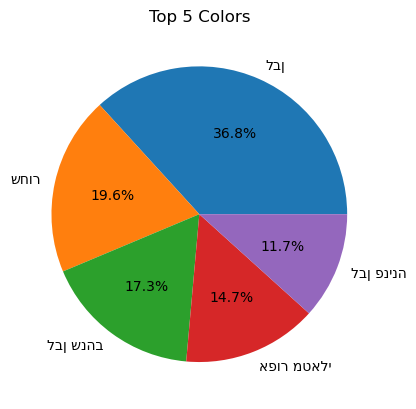

In [20]:
import matplotlib.pyplot as plt

# Get the top 5 colors
top_colors = df['Color'].value_counts().head(5)

# Pie chart of the top 5 colors with LTR text direction
plt.pie(top_colors, labels=top_colors.index, autopct='%1.1f%%')
plt.title('Top 5 Colors')
plt.show()

# Disable Hebrew font
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False

### This pie chart describes that the most popular car colors and White and Black.

------------

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657 entries, 0 to 7537
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   car_title                  3657 non-null   object
 1   year_of_manufactoring      3657 non-null   int64 
 2   num_of_owners              3657 non-null   int64 
 3   car_engine_size            3657 non-null   int32 
 4   price                      3657 non-null   int32 
 5   air_pollution_rate         3657 non-null   int32 
 6   Kilometers                 3657 non-null   int32 
 7   Engine Type                3657 non-null   object
 8   Transmission               3657 non-null   object
 9   Color                      3657 non-null   object
 10  First Registration Year    3657 non-null   int32 
 11  Test Valid Until           3657 non-null   int32 
 12  Current Ownership          3657 non-null   object
 13  Suitable for Disabilities  3657 non-null   object
 14  Horse Po

Let's check how many unique values there are in the categorical columns, and convert them into numerical ones later.

In [58]:
print(df['car_title'].nunique())
print(df['Engine Type'].nunique())
print(df['Color'].nunique())
print(df['Current Ownership'].nunique())
print(df['Transmission'].nunique())
print(df['Suitable for Disabilities'].nunique())

424
5
47
9
4
2


-----------------------
car_title - 424 unique values

Engine Type - 5 unique values

Color - 47 unique values

Current Ownership - 9 unique values

Transmission - 4 unique values

Suitable for Disabilities - 2 unique values (yes or no)

-----------------------

describe() function shows information and statistics about the DataFrame, thus we can infer which columns need to be handled seperately (for example: outliers)

In [59]:
df.describe()

,year_of_manufactoring,num_of_owners,car_engine_size,price,air_pollution_rate,Kilometers,First Registration Year,Test Valid Until,Horse Power
count,3657.000000,3657.000000,3657.000000,3.657000e+03,3657.000000,3.657000e+03,3657.000000,3657.000000,3657.000000
mean,2016.789445,1.861362,1854.445721,1.158486e+05,8.640416,1.100614e+05,2016.789445,2023.530763,161.908942
std,3.578285,1.075222,670.026513,2.099122e+05,5.533174,7.483898e+04,3.578285,0.519001,70.896665
min,2004.000000,0.000000,875.000000,5.000000e+03,1.000000,1.000000e+00,2004.000000,2023.000000,60.000000
25%,2015.000000,1.000000,1461.000000,5.200000e+04,4.000000,5.500000e+04,2015.000000,2023.000000,115.000000
50%,2017.000000,2.000000,1598.000000,8.800000e+04,8.000000,1.000000e+05,2017.000000,2024.000000,150.000000
75%,2019.000000,2.000000,1998.000000,1.350000e+05,15.000000,1.500000e+05,2019.000000,2024.000000,180.000000
max,2023.000000,10.000000,6700.000000,1.111111e+07,15.000000,1.150000e+06,2023.000000,2026.000000,661.000000


# Handling outliers

In [60]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers, as taught on course
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame, we used ChatGPT to write this specific command.
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]

# Balancing the average of this column, so we limit the car limit to 200,000 shekels
df = df[df['price'] < 200000]

In [61]:
Q1 = df['Kilometers'].quantile(0.25)
Q3 = df['Kilometers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Excluding the outliers that were calculated before
df = df[(df['Kilometers'] >= lower_bound) & (df['Kilometers'] <= upper_bound)]

In [62]:
df.describe()

,year_of_manufactoring,num_of_owners,car_engine_size,price,air_pollution_rate,Kilometers,First Registration Year,Test Valid Until,Horse Power
count,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000
mean,2016.468234,1.891677,1760.345299,84348.775095,8.733799,112221.572109,2016.468234,2023.522872,146.814485
std,3.444500,1.055508,588.257374,45472.565642,5.576259,61976.207393,3.444500,0.509008,51.703580
min,2006.000000,0.000000,875.000000,5500.000000,1.000000,1.000000,2006.000000,2023.000000,60.000000
25%,2015.000000,1.000000,1395.000000,48000.000000,4.000000,64225.000000,2015.000000,2023.000000,112.000000
50%,2017.000000,2.000000,1598.000000,80000.000000,9.000000,107000.000000,2017.000000,2024.000000,141.000000
75%,2019.000000,2.000000,1998.000000,114900.000000,15.000000,151000.000000,2019.000000,2024.000000,165.000000
max,2023.000000,8.000000,6600.000000,199900.000000,15.000000,290000.000000,2023.000000,2026.000000,445.000000


As you can see, we normalized the price and mileage columns and got more reliable data.
Emphasis on the kilometers column.

------
Correlation table that shows the connections between the numerical features in our data set:

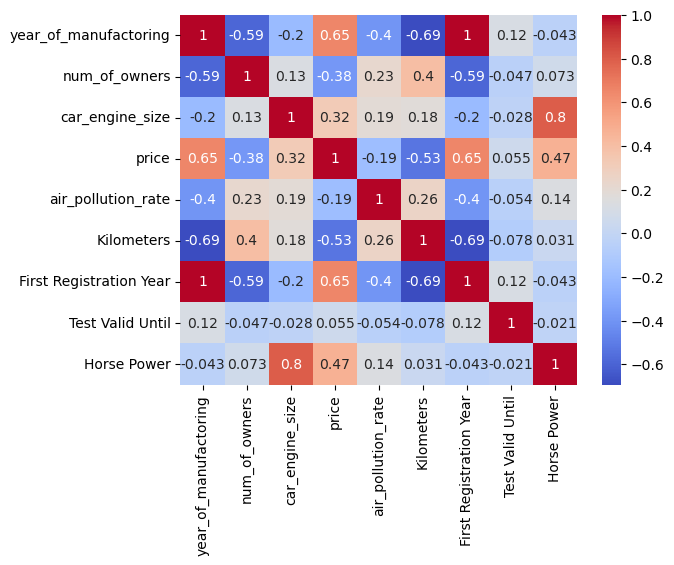

In [63]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

The correlation table shows that "First Registration Year" and "Year Of Manufactoring" are practically identical, thus one of them should be removed.


# we can see the connections between columns, the closer the value is to one, the more connection there is.

for example : The later the car's entry year, the higher the car's price
The greater the horsepower of the vehicle, the greater the engine
The greater the horse power, the more the price will be accordingly
The quantity of kilometers and cost were not closely correlated.
A correlation was found between the number of kilometers the vehicle traveled and the number of hands the vehicle
passed through.

------------

In [64]:
df = df.drop('First Registration Year', axis=1)

## Printing some graphical scatterplots to show connections between features:

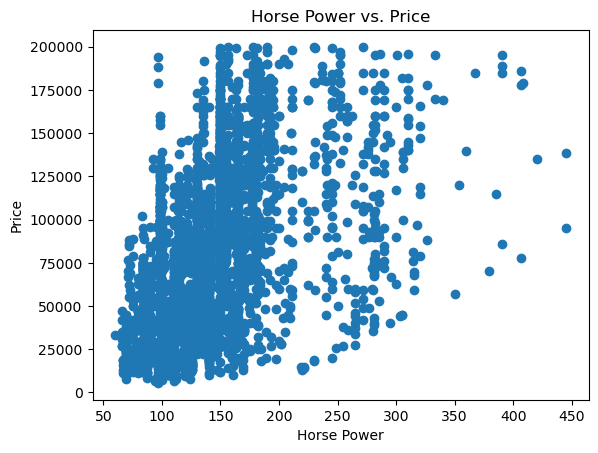

In [65]:
plt.scatter(df['Horse Power'], df['price'])
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.title('Horse Power vs. Price')
plt.show()

We can infer that there isn't direct connection between the horse power of a car and its price, because, for example, the car with the most horse power (450) costs less than cars that their horse power's stat is lower.

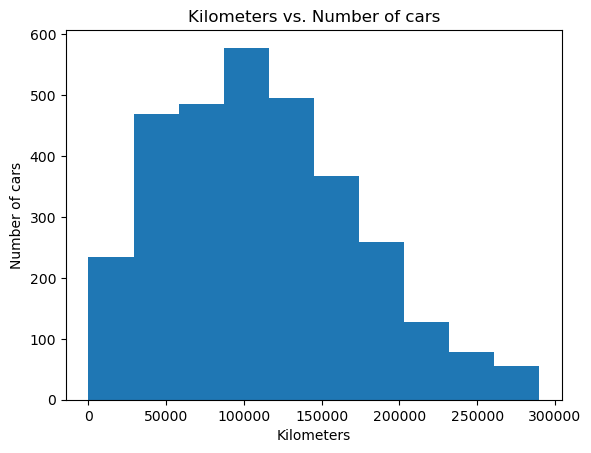

In [66]:
plt.hist(df['Kilometers'])
plt.xlabel('Kilometers')
plt.ylabel('Number of cars')
plt.title('Kilometers vs. Number of cars')
plt.show()

The majority of the cars in the DataFrame vary arount 100,000 kms.

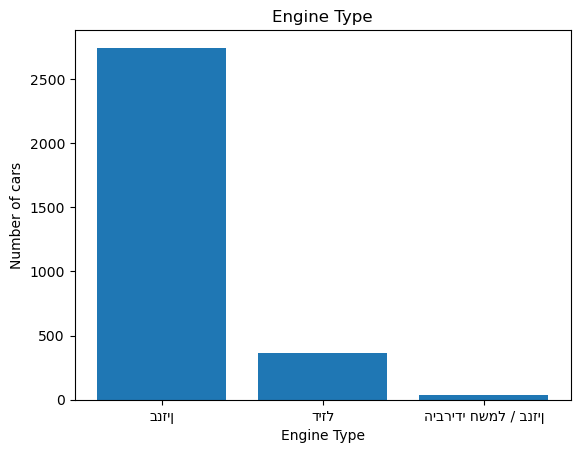

In [67]:
engine_type_counts = df['Engine Type'].value_counts()

plt.bar(engine_type_counts.index, engine_type_counts.values)
plt.xlabel('Engine Type')
plt.ylabel('Number of cars')
plt.title('Engine Type')
plt.show()

Most of the cars in the DataFrame use gasoline.

## Transformation of categorical values to numerical ones

Here we used with LabelIncoder and because the column of adapted for the disabled is binary, meaning it contains only yes and no, then we will convert it in a different way.

In [68]:
df['Suitable for Disabilities'] = df['Suitable for Disabilities'].map({'כן':1, 'לא':0})

In [69]:
label_encoder = LabelEncoder()

categorical_columns = ['car_title', 'Engine Type', 'Transmission', 'Color', 'Current Ownership']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [70]:
df.head()

,car_title,year_of_manufactoring,num_of_owners,car_engine_size,price,air_pollution_rate,Kilometers,Engine Type,Transmission,Color,Test Valid Until,Current Ownership,Suitable for Disabilities,Horse Power
0,50,2014,1,3604,105000,5,209000,0,1,31,2023,8,0,282
1,129,2017,1,1999,99000,15,130000,0,1,2,2024,8,0,155
3,152,2020,1,1998,124000,6,29000,0,1,25,2024,8,0,165
4,284,2018,1,1498,60000,15,147000,0,1,28,2023,8,0,182
5,18,2015,2,1364,18000,15,165000,0,1,43,2024,8,0,140


In [71]:
df.size

44072

Total of 44072 entries in the dataset after cleaning.

-------------
Saving the processed data into a new csv file:

In [30]:
df.to_csv('processed_yad2.csv', index=False)